# [Lab Session 3](fourier.ipynb)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
from PIL import Image

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [17]:
cell_img = plt.imread('data/cells.png')

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


<class 'numpy.ndarray'>


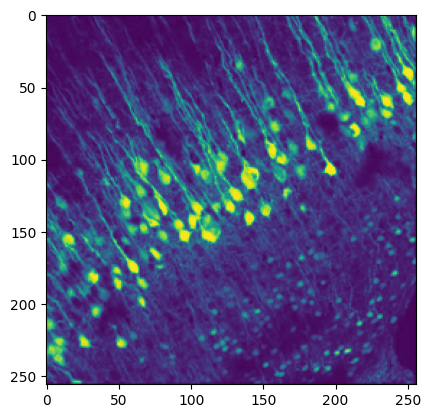

In [20]:
cell_img = np.array(cell_img)
#converting array of image intensities into PIL format so that we can apply the resize function
cell_img_pil= Image.fromarray((cell_img*255).astype(np.uint8))
cell_img_resize=np.array(cell_img_pil.resize((256,256)))
print(type(cell_img_resize)) #type should be array, needed for the next function
plt.imshow(cell_img_resize)
cell_ft = np.fft.fft2(cell_img)


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [21]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

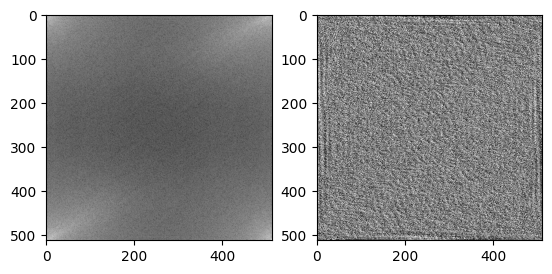

In [22]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


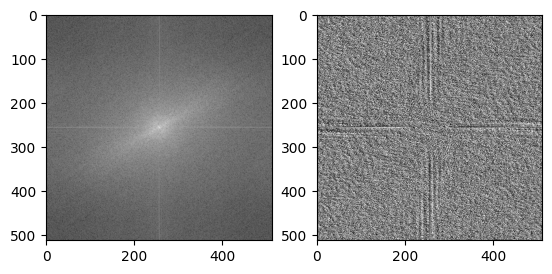

In [26]:
cell_ft_shift=np.fft.fftshift(cell_ft)
#extracting amplitude and phase
amplitude_shift = np.abs(cell_ft_shift)
phase_shift = np.angle(cell_ft_shift)
#show it
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_shift), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_shift, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


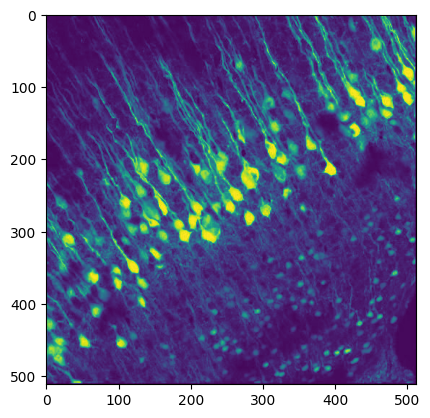

In [29]:
cell_ft_restored = np.fft.ifft2(np.fft.ifftshift(cell_ft_shift)).real
plt.imshow(cell_ft_restored)


---


**[Task 2 (a).]()** Load the brain CT image.


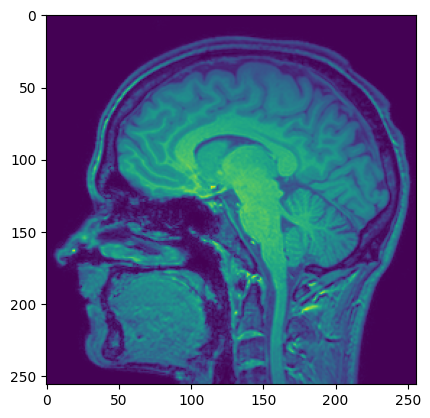

In [32]:
ct_image=plt.imread("data/brain_ct.png")
plt.imshow(ct_image)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [ ]:
ct_image_fft=np.fft.fft2(ct_image)
ct_image_shifted=np.fft.fftshift(ct_image_fft)
amplitude_shift_ct = np.abs(cell_ft_shift)
phase_shift_ct = np.angle(cell_ft_shift)


In [ ]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [ ]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
